In [1]:
import pandas as pd
import numpy as np

In [2]:
heart=pd.read_csv('heart.csv')

In [3]:
heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
heart.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
heart.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
heart['trestbps'].fillna(heart['trestbps'].mean(),inplace=True)
heart['chol'].fillna(heart['chol'].mean(),inplace=True)
heart['fbs'].fillna(heart['fbs'].mode()[0],inplace=True)
heart['restecg'].fillna(heart['restecg'].mode()[0],inplace=True)
heart['thalch'].fillna(heart['thalch'].mode()[0],inplace=True)
heart['exang'].fillna(heart['exang'].mode()[0],inplace=True)
heart['oldpeak'].fillna(heart['oldpeak'].mean(),inplace=True)
heart['slope'].fillna(heart['slope'].mode()[0],inplace=True)
heart['thal'].fillna(heart['thal'].mode()[0],inplace=True)
heart['ca'].fillna(heart['ca'].mode()[0],inplace=True)

C:\Users\kamil\AppData\Local\Temp\ipykernel_12732\3851132783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['trestbps'].fillna(heart['trestbps'].mean(),inplace=True)
C:\Users\kamil\AppData\Local\Temp\ipykernel_12732\3851132783.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [8]:
heart.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
 heart.duplicated().any()

np.False_

In [10]:
cate_val=[]
cont_val=[]
for column in heart.columns:
    if heart[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [11]:
cate_val

['sex',
 'dataset',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca',
 'thal',
 'num']

In [12]:
cont_val

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [13]:
cate_val.remove('num')

In [14]:
heart=pd.get_dummies(heart,columns=cate_val,drop_first=True)

In [15]:
i=0
for val in heart['num']:
    if val >0:
       heart['num'][i]=1
    i+=1

C:\Users\kamil\AppData\Local\Temp\ipykernel_12732\4235764826.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  heart['num'][i]=1
C:\Users\kamil\AppData\Local\Temp\ipykernel_12732\4235764826.py:4: SettingWithCopyWarning: 
A value is trying 

In [16]:
heart.shape

(920, 25)

In [17]:
heart.head()

,id,age,trestbps,chol,thalch,oldpeak,num,sex_Male,dataset_Hungary,dataset_Switzerland,...,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,ca_1.0,ca_2.0,ca_3.0,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,150.0,2.3,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,67,160.0,286.0,108.0,1.5,1,True,False,False,...,False,False,True,True,False,False,False,True,True,False
2,3,67,120.0,229.0,129.0,2.6,1,True,False,False,...,False,False,True,True,False,False,True,False,False,True
3,4,37,130.0,250.0,187.0,3.5,0,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,5,41,130.0,204.0,172.0,1.4,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [18]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
heart[cont_val]=st.fit_transform(heart[cont_val])

In [19]:
heart.head()

,id,age,trestbps,chol,thalch,oldpeak,num,sex_Male,dataset_Hungary,dataset_Switzerland,...,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,ca_1.0,ca_2.0,ca_3.0,thal_normal,thal_reversable defect
0,-1.730169,1.007386,0.698041,0.311021,0.462879,1.349421,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.726404,1.432034,1.511761,0.797713,-1.197349,0.589832,1,True,False,False,...,False,False,True,True,False,False,False,True,True,False
2,-1.722639,1.432034,-0.658158,0.274289,-0.367235,1.634267,1,True,False,False,...,False,False,True,True,False,False,True,False,False,True
3,-1.718873,-1.752828,-0.115679,0.467130,1.925460,2.488805,0,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,-1.715108,-1.328180,-0.115679,0.044717,1.332522,0.494884,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [20]:
X=heart.drop('num',axis=1)

In [21]:
Y=heart['num']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
X_train

,id,age,trestbps,chol,thalch,oldpeak,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,...,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,ca_1.0,ca_2.0,ca_3.0,thal_normal,thal_reversable defect
880,1.583321,0.901224,0.000000,-2.675001e-01,-0.722998,2.014062,True,False,False,True,...,False,True,True,True,False,False,False,False,True,False
457,-0.009413,0.051927,0.969281,-2.609929e-16,-0.643940,-0.834397,True,True,False,False,...,True,False,False,True,False,False,False,False,True,False
797,1.270799,-0.266559,0.000000,1.284405e+00,0.462879,0.000000,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
25,-1.636036,-0.372721,-0.658158,1.824606e-01,0.779112,0.684781,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
84,-1.413881,-0.160397,-0.658158,1.155845e+00,1.332522,-0.644500,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.331044,0.582737,0.426801,-2.032200e-01,0.937229,-0.834397,True,False,False,False,...,True,False,True,False,True,True,False,False,False,True
270,-0.713530,0.795061,0.426801,7.226610e-02,-0.011472,0.969627,True,False,False,False,...,False,False,True,False,True,True,False,False,False,True
860,1.508015,2.281330,1.511761,1.018102e+00,-1.039232,1.064576,True,False,False,True,...,True,False,True,False,False,False,False,False,False,True
435,-0.092251,-0.054235,0.426801,1.549119e-01,0.146645,1.064576,False,True,False,False,...,True,False,True,True,False,False,False,False,True,False


In [25]:
Y_train

880    1
457    0
797    1
25     0
84     0
      ..
106    1
270    1
860    0
435    0
102    0
Name: num, Length: 736, dtype: int64

In [26]:
X_test

,id,age,trestbps,chol,thalch,oldpeak,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,...,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,ca_1.0,ca_2.0,ca_3.0,thal_normal,thal_reversable defect
319,-0.529029,-1.858990,-0.658158,-0.304232,1.648755,-0.834397,True,True,False,False,...,True,False,False,True,False,False,False,False,True,False
377,-0.310640,-0.903531,0.426801,0.228375,-0.643940,-0.834397,True,True,False,False,...,True,False,False,True,False,False,False,False,True,False
538,0.295578,-0.585045,1.511761,1.192576,-1.829816,0.589832,True,True,False,False,...,True,False,True,True,False,False,False,False,True,False
296,-0.615631,0.582737,1.728752,-0.212403,-1.908875,0.115089,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
531,0.269221,-1.434342,0.969281,1.771097,-0.327706,1.064576,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,-0.291813,-0.797369,0.426801,0.696701,1.055817,-0.834397,True,True,False,False,...,True,False,True,True,False,False,False,False,True,False
97,-1.364932,0.688899,0.969281,0.540593,0.739583,1.634267,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
906,1.681220,0.795061,-0.658158,1.266039,-1.592641,-0.834397,True,False,False,True,...,True,False,True,True,False,False,False,False,True,False
467,0.028240,0.158089,-0.658158,0.650787,0.067586,-0.834397,True,True,False,False,...,True,False,False,True,False,False,False,False,True,False


In [27]:
Y_test

319    0
377    0
538    1
296    1
531    1
      ..
382    0
97     1
906    1
467    0
732    1
Name: num, Length: 184, dtype: int64

*LOGISTIC REGRESSION*

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [30]:
Y_pred1=log.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(Y_test,Y_pred1)

0.8586956521739131

In [33]:
from sklearn import svm

In [34]:
svm=svm.SVC()

In [35]:
svm.fit(X_test,Y_test)

SVC()

In [36]:
Y_pred2=svm.predict(X_test)

In [37]:
accuracy_score(Y_test,Y_pred2)

0.907608695652174

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [40]:
Y_pred3=knn.predict(X_test)
accuracy_score(Y_test,Y_pred3)

0.8369565217391305

In [41]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(Y_test,y_pred))

In [42]:
score

[0.8206521739130435,
 0.7663043478260869,
 0.8532608695652174,
 0.8206521739130435,
 0.8369565217391305,
 0.8369565217391305,
 0.8532608695652174,
 0.8260869565217391,
 0.8586956521739131,
 0.8532608695652174,
 0.8641304347826086,
 0.8641304347826086,
 0.8695652173913043,
 0.8641304347826086,
 0.8641304347826086,
 0.8586956521739131,
 0.8586956521739131,
 0.8586956521739131,
 0.8695652173913043,
 0.8586956521739131,
 0.8695652173913043,
 0.8586956521739131,
 0.8641304347826086,
 0.8532608695652174,
 0.8532608695652174,
 0.8478260869565217,
 0.8532608695652174,
 0.842391304347826,
 0.8478260869565217,
 0.842391304347826,
 0.842391304347826,
 0.842391304347826,
 0.842391304347826,
 0.8478260869565217,
 0.842391304347826,
 0.8478260869565217,
 0.8478260869565217,
 0.8478260869565217,
 0.8369565217391305]

In [43]:
import matplotlib.pyplot as plt

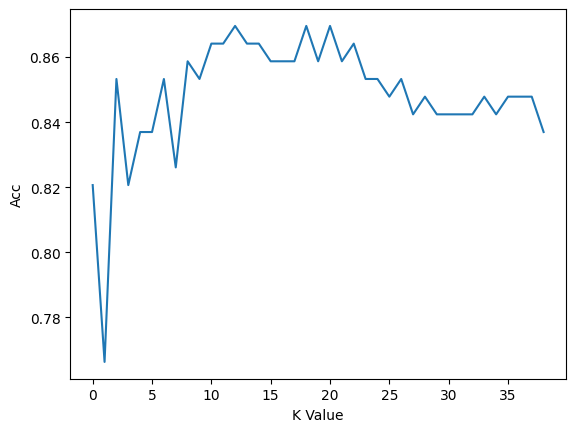

In [44]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [45]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8695652173913043

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred4= dt.predict(X_test)
accuracy_score(Y_test,Y_pred4)

0.8206521739130435

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred5= rf.predict(X_test)
accuracy_score(Y_test,Y_pred5)


0.875

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
Y_pred6 = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred6)

0.8804347826086957

In [49]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(Y_test,Y_pred1)*100,
                                accuracy_score(Y_test,Y_pred2)*100,
                                accuracy_score(Y_test,Y_pred3)*100,
                                accuracy_score(Y_test,Y_pred4)*100,
                                accuracy_score(Y_test,Y_pred5)*100,
                                accuracy_score(Y_test,Y_pred6)*100]})

In [50]:
final_data

,Models,ACC
0,LR,85.869565
1,SVM,90.760870
2,KNN,83.695652
3,DT,82.065217
4,RF,87.500000
5,GB,88.043478


In [51]:
import seaborn as sns

<BarContainer object of 6 artists>

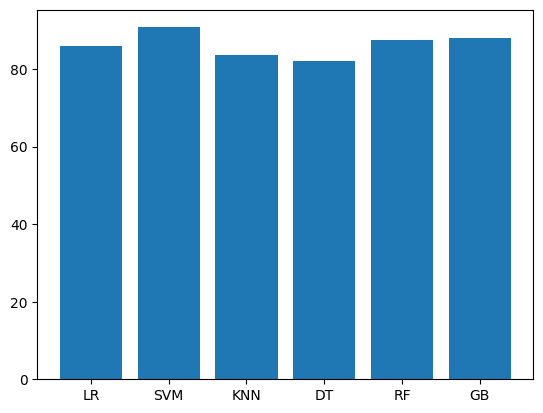

In [52]:
plt.bar(final_data['Models'],final_data['ACC'])